In [10]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import pearsonr
from numpy import cov
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
population = pd.read_csv("Resources/Census-Data-by-Chicago-Community-Area-2016.csv")
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")

crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
sociecn = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
sociecn = sociecn[:-1]
sociecn['Community Area Number'] = sociecn['Community Area Number'].astype(int)
sociecn = sociecn.rename(columns = {'Community Area Number':'Community Area'})


In [11]:
potholes.head()
potholes_df=pd.DataFrame(potholes)

In [12]:
potholes_df=potholes.groupby(['Community Area'], as_index=False)

potholes_group=potholes_df.count()

potholes_group.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
0,0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632


In [13]:
#Drop non neighborhood (Community zero 0)

potholes_group = potholes_group.drop(potholes_group.index[0])

In [14]:
potholes_group.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633


In [15]:
crime=crime[['Ward','Community Area','Domestic']]
community_crime=crime.groupby(['Community Area', 'Domestic'], as_index=False)
crime_group=community_crime.count()
crime_group

,Community Area,Domestic,Ward
0,1,False,752
1,1,True,117
2,2,False,773
3,2,True,95
4,3,False,763
5,3,True,84
6,4,False,468
7,4,True,57
8,5,False,353
9,5,True,23


In [183]:

population

,Community,Community Area,population
0,Rogers Park,1,54402
1,West Ridge,2,72211
2,Uptown,3,55137
3,Lincoln Square,4,40761
4,North Center,5,34623
5,Lake View,6,98212
6,Lincoln Park,7,66959
7,Near North Side,8,89465
8,Edison Park,9,11356
9,Norwood Park,10,36083


In [7]:
merged_df=potholes_group.merge(population, on='Community Area', how='left')



In [8]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population
0,0.0,149,149,149,149,149,82,82,83,149,...,149,149,149,149,1,148,148,148,NaN,NaN
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,701,701,321,701,701,701,Rogers Park,54402.0
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,1603,1603,142,1603,1603,1603,West Ridge,72211.0
3,3.0,485,485,485,485,485,373,373,376,485,...,485,485,485,485,314,485,485,485,Uptown,55137.0
4,4.0,632,632,632,632,632,412,412,411,632,...,632,632,632,632,228,632,632,632,Lincoln Square,40761.0
5,5.0,633,633,633,633,633,431,431,431,633,...,633,633,633,633,256,633,633,633,North Center,34623.0
6,6.0,990,990,990,990,990,790,790,790,990,...,990,990,990,990,704,990,990,990,Lake View,98212.0
7,7.0,915,915,915,915,915,747,747,749,915,...,915,915,915,915,182,915,915,915,Lincoln Park,66959.0
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,...,1310,1310,1310,1310,30,1309,1309,1309,Near North Side,89465.0
9,9.0,532,532,532,532,532,326,326,326,532,...,532,532,532,532,0,532,532,532,Edison Park,11356.0


In [9]:
merged_df=merged_df.merge(crime_group, on="Community Area", how='left')
merged_df=merged_df.rename(columns={'Ward_y':'Crime Count'})

NameError: name 'crime_group' is not defined

In [187]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Ward_x,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,321,701,701,701,Rogers Park,54402,False,752
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,321,701,701,701,Rogers Park,54402,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,142,1603,1603,1603,West Ridge,72211,False,773
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,142,1603,1603,1603,West Ridge,72211,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,314,485,485,485,Uptown,55137,False,763
5,3.0,485,485,485,485,485,373,373,376,485,...,485,485,314,485,485,485,Uptown,55137,True,84
6,4.0,632,632,632,632,632,412,412,411,632,...,632,632,228,632,632,632,Lincoln Square,40761,False,468
7,4.0,632,632,632,632,632,412,412,411,632,...,632,632,228,632,632,632,Lincoln Square,40761,True,57
8,5.0,633,633,633,633,633,431,431,431,633,...,633,633,256,633,633,633,North Center,34623,False,353
9,5.0,633,633,633,633,633,431,431,431,633,...,633,633,256,633,633,633,North Center,34623,True,23


In [188]:
merged_df['Crime Count Adjusted']=merged_df['Crime Count']/merged_df['population']

In [189]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,321,701,701,701,Rogers Park,54402,False,752,0.013823
1,1.0,701,701,701,701,701,355,355,353,701,...,701,321,701,701,701,Rogers Park,54402,True,117,0.002151
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,142,1603,1603,1603,West Ridge,72211,False,773,0.010705
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,142,1603,1603,1603,West Ridge,72211,True,95,0.001316
4,3.0,485,485,485,485,485,373,373,376,485,...,485,314,485,485,485,Uptown,55137,False,763,0.013838
5,3.0,485,485,485,485,485,373,373,376,485,...,485,314,485,485,485,Uptown,55137,True,84,0.001523
6,4.0,632,632,632,632,632,412,412,411,632,...,632,228,632,632,632,Lincoln Square,40761,False,468,0.011482
7,4.0,632,632,632,632,632,412,412,411,632,...,632,228,632,632,632,Lincoln Square,40761,True,57,0.001398
8,5.0,633,633,633,633,633,431,431,431,633,...,633,256,633,633,633,North Center,34623,False,353,0.010196
9,5.0,633,633,633,633,633,431,431,431,633,...,633,256,633,633,633,North Center,34623,True,23,0.000664


In [190]:
merged_df['Pothole Count Adjusted']=merged_df['CREATION DATE']/merged_df['population']

In [191]:

merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted,Pothole Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,False,752,0.013823,0.012886
1,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,True,117,0.002151,0.012886
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,False,773,0.010705,0.022199
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,True,95,0.001316,0.022199
4,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,False,763,0.013838,0.008796
5,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,True,84,0.001523,0.008796
6,4.0,632,632,632,632,632,412,412,411,632,...,228,632,632,632,Lincoln Square,40761,False,468,0.011482,0.015505
7,4.0,632,632,632,632,632,412,412,411,632,...,228,632,632,632,Lincoln Square,40761,True,57,0.001398,0.015505
8,5.0,633,633,633,633,633,431,431,431,633,...,256,633,633,633,North Center,34623,False,353,0.010196,0.018283
9,5.0,633,633,633,633,633,431,431,431,633,...,256,633,633,633,North Center,34623,True,23,0.000664,0.018283


In [192]:
covariance=cov(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
covariance

array([[ 1.85131503e-04, -7.54334427e-06],
       [-7.54334427e-06,  1.03366876e-04]])

In [193]:
corr, _ = pearsonr(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.055


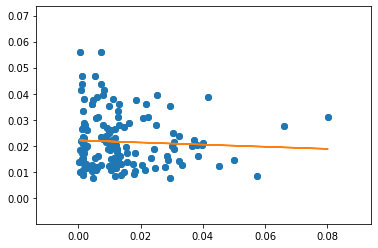

In [194]:
plt.scatter(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
line = slope*merged_df['Crime Count Adjusted']+intercept
plt.plot(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'],'o',merged_df['Crime Count Adjusted'] , line)

In [195]:
crime

,Ward,Community Area
0,41,76
1,34,49
2,42,32
3,32,6
4,6,69
5,26,22
6,39,16
7,42,32
8,32,6
9,28,25


In [196]:
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")


In [197]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [198]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10819224,JA119772,12/31/2016 11:59:00 PM,100XX W OHARE ST,810,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,...,41,76,6,1100658.0,1934241.0,2016,02/10/2018 03:50:01 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
1,10801137,JA100016,12/31/2016 11:58:00 PM,0000X W 113TH PL,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,False,False,...,34,49,04B,1178014.0,1829709.0,2016,02/10/2018 03:50:01 PM,41.688033,-87.623931,"(41.688033246, -87.623931468)"
2,10802006,JA100012,12/31/2016 11:55:00 PM,0000X E WACKER PL,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1176964.0,1902140.0,2016,02/10/2018 03:50:01 PM,41.886815,-87.625593,"(41.886814897, -87.625592678)"
3,10801110,JA100027,12/31/2016 11:55:00 PM,030XX N LINCOLN AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,RESIDENCE,True,False,...,32,6,22,1166154.0,1920300.0,2016,01/07/2017 03:56:13 PM,41.936885,-87.664770,"(41.936884881, -87.66476981)"
4,10801865,JA100839,12/31/2016 11:54:00 PM,078XX S INDIANA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,6,69,14,1178949.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.752307,-87.619798,"(41.752307019, -87.619797619)"
5,10801291,JA100030,12/31/2016 11:50:00 PM,018XX N DRAKE AVE,460,BATTERY,SIMPLE,RESIDENCE,False,False,...,26,22,08B,1152529.0,1911998.0,2016,02/10/2018 03:50:01 PM,41.914384,-87.715064,"(41.914384153, -87.715063719)"
6,10802735,JA100931,12/31/2016 11:50:00 PM,042XX N KEELER AVE,031A,ROBBERY,ARMED: HANDGUN,ALLEY,False,False,...,39,16,3,1147645.0,1927783.0,2016,02/10/2018 03:50:01 PM,41.957795,-87.732601,"(41.957794792, -87.732600568)"
7,10801171,JA100127,12/31/2016 11:47:00 PM,001XX E WACKER DR,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1177683.0,1902638.0,2016,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
8,10803002,JA100590,12/31/2016 11:45:00 PM,015XX W BELMONT AVE,320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,32,6,3,1165426.0,1921325.0,2016,02/10/2018 03:50:01 PM,41.939713,-87.667416,"(41.939713083, -87.667416039)"
9,10801143,JA100035,12/31/2016 11:45:00 PM,048XX W HURON ST,334,ROBBERY,ATTEMPT: ARMED-KNIFE/CUT INSTR,STREET,False,True,...,28,25,3,1144064.0,1904203.0,2016,02/10/2018 03:50:01 PM,41.893157,-87.746359,"(41.893157054, -87.746359097)"


In [199]:
crime.count()

ID                      65534
Case Number             65534
Date                    65534
Block                   65534
IUCR                    65534
Primary Type            65534
Description             65534
Location Description    65248
Arrest                  65534
Domestic                65534
Beat                    65534
District                65534
Ward                    65534
Community Area          65534
FBI Code                65534
X Coordinate            65061
Y Coordinate            65061
Year                    65534
Updated On              65534
Latitude                65061
Longitude               65061
Location                65061
dtype: int64

In [200]:
crime=crime[['Ward','Community Area','Domestic']]
community_crime2=crime.groupby(['Community Area', 'Domestic'], as_index=False)
crime_group2=community_crime2.count()
crime_group2

,Community Area,Domestic,Ward
0,1,False,752
1,1,True,117
2,2,False,773
3,2,True,95
4,3,False,763
5,3,True,84
6,4,False,468
7,4,True,57
8,5,False,353
9,5,True,23


In [201]:
crime_group2=crime_group2.sort_values(by= ['Domestic', 'Community Area'], ascending=True)

In [202]:
crime_group2 = crime_group2.drop(crime_group2.index[0:77])

In [203]:
crime_group2


,Community Area,Domestic,Ward
1,1,True,117
3,2,True,95
5,3,True,84
7,4,True,57
9,5,True,23
11,6,True,66
13,7,True,27
15,8,True,104
17,9,True,13
19,10,True,35


In [204]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted,Pothole Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,False,752,0.013823,0.012886
1,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,True,117,0.002151,0.012886
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,False,773,0.010705,0.022199
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,True,95,0.001316,0.022199
4,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,False,763,0.013838,0.008796
5,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,True,84,0.001523,0.008796
6,4.0,632,632,632,632,632,412,412,411,632,...,228,632,632,632,Lincoln Square,40761,False,468,0.011482,0.015505
7,4.0,632,632,632,632,632,412,412,411,632,...,228,632,632,632,Lincoln Square,40761,True,57,0.001398,0.015505
8,5.0,633,633,633,633,633,431,431,431,633,...,256,633,633,633,North Center,34623,False,353,0.010196,0.018283
9,5.0,633,633,633,633,633,431,431,431,633,...,256,633,633,633,North Center,34623,True,23,0.000664,0.018283


In [205]:
merged_df=merged_df.merge(crime_group2, on="Community Area", how='left')

In [206]:
merged_df


,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LONGITUDE,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Ward
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,False,763,0.013838,0.008796,True,84
5,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,True,84,0.001523,0.008796,True,84
6,4.0,632,632,632,632,632,412,412,411,632,...,632,632,Lincoln Square,40761,False,468,0.011482,0.015505,True,57
7,4.0,632,632,632,632,632,412,412,411,632,...,632,632,Lincoln Square,40761,True,57,0.001398,0.015505,True,57
8,5.0,633,633,633,633,633,431,431,431,633,...,633,633,North Center,34623,False,353,0.010196,0.018283,True,23
9,5.0,633,633,633,633,633,431,431,431,633,...,633,633,North Center,34623,True,23,0.000664,0.018283,True,23


In [207]:
merged_df=merged_df.rename(columns={'Ward':'Domestic Crime Count'})

In [208]:
merged_df


,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LONGITUDE,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Domestic Crime Count
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,False,763,0.013838,0.008796,True,84
5,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,True,84,0.001523,0.008796,True,84
6,4.0,632,632,632,632,632,412,412,411,632,...,632,632,Lincoln Square,40761,False,468,0.011482,0.015505,True,57
7,4.0,632,632,632,632,632,412,412,411,632,...,632,632,Lincoln Square,40761,True,57,0.001398,0.015505,True,57
8,5.0,633,633,633,633,633,431,431,431,633,...,633,633,North Center,34623,False,353,0.010196,0.018283,True,23
9,5.0,633,633,633,633,633,431,431,431,633,...,633,633,North Center,34623,True,23,0.000664,0.018283,True,23


In [209]:
merged_df['Domestic Crime Count Adjusted']=merged_df['Domestic Crime Count']/merged_df['population']

In [210]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Domestic Crime Count,Domestic Crime Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117,0.002151
1,1.0,701,701,701,701,701,355,355,353,701,...,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117,0.002151
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95,0.001316
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95,0.001316
4,3.0,485,485,485,485,485,373,373,376,485,...,485,Uptown,55137,False,763,0.013838,0.008796,True,84,0.001523
5,3.0,485,485,485,485,485,373,373,376,485,...,485,Uptown,55137,True,84,0.001523,0.008796,True,84,0.001523
6,4.0,632,632,632,632,632,412,412,411,632,...,632,Lincoln Square,40761,False,468,0.011482,0.015505,True,57,0.001398
7,4.0,632,632,632,632,632,412,412,411,632,...,632,Lincoln Square,40761,True,57,0.001398,0.015505,True,57,0.001398
8,5.0,633,633,633,633,633,431,431,431,633,...,633,North Center,34623,False,353,0.010196,0.018283,True,23,0.000664
9,5.0,633,633,633,633,633,431,431,431,633,...,633,North Center,34623,True,23,0.000664,0.018283,True,23,0.000664


In [211]:
corr, _ = pearsonr(merged_df['Domestic Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.035
